# Classification Part 3

## Support Vector Machine (SVM): A first example with linear classification

Classifying data is a common task in machine learning. Suppose some given data points each belong to one of two classes, and the goal is to decide which class a new data point will be in. In the case of support-vector machines, a data point is viewed as a $p$-dimensional vector (a list of $p$ numbers), and we want to know whether we can separate such points with a $(p-1)$-dimensional hyperplane. This is called a linear classifier.

There are many hyperplanes that might classify the data. One reasonable choice as the best hyperplane is the one that represents the largest separation, or margin, between the two classes. So we choose the hyperplane so that the distance from it to the nearest data point on each side is maximized. If such a hyperplane exists, it is known as the maximum-margin hyperplane and the linear classifier it defines is known as a maximum-margin classifier.

In this first example, the separation between two class of data will be obtain using a Support Vector Machine.

In [ ]:
import pandas as pd
pd.set_option("display.max_rows", 16)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics

y = np.array([2, 8, 1.8, 8, 0.6, 11, 9, 4, 3.3, 3.4, 2])
x = np.array([0.31, 1.48, 0.53, 1.07, 0.03, 1.84, 1.8 , 0.07, 1.91, 0.27, 0.57])

plt.scatter(x,y)
plt.show()

In order to prepare for the classification, the dataset is separated manually into two classes.

In [ ]:
X_train=np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),axis=1)
y_train = np.array([0,1,0,1,0,1,1,0,1,0,0])

print(X_train.shape)
print(y_train.shape)

In [ ]:
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.scatter(x,y, c=y_train, cmap=cm_bright)
plt.show()

### LinearSVC and SVC modules from sklearn

The advantages of support vector machines are:

- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation

#### SVC: Support Vector Classifier

This class supports both dense and sparse input and the multiclass support is handled according to a one-vs-the-rest scheme.

The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples. For large datasets consider using LinearSVC.

`SVC()` is a Python class that allows you to classify using support vector methods. It has some options `sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)`:
- *C* Leave it as is.
- *kernel* Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used.
- *degree* Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
- *gamma* Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Leave it as is
- *coef0* Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.
- *shrinking* Leave it as is.
- *probability* Whether to enable probability estimates. This must be enabled prior to calling fit, will **slow down** that method as it internally uses 5-fold cross-validation, and predict_proba may be inconsistent with predict.
- *tol* Tolerance for stopping criteria.
- *cache_size* Specify the size of the kernel cache (in MB). (Don't make it too big)
- *class_weight* Leave it as is.
- *verbose* Enable verbose output.
- *max_iter* Hard limit on iterations within solver, **or -1 for no limit, which is default choice**.
- *decision_function_shape* Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2). However, one-vs-one (‘ovo’) is always used as multi-class strategy. The parameter is ignored for binary classification.
- *break_ties* If true, decision_function_shape='ovr', and number of classes > 2, predict will break ties according to the confidence values of decision_function; otherwise the first class among the tied classes is returned.
- *random_state* Controls the pseudo randomness

#### LinearSVC: Linear Support Vector Classification.

Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

`LinearSVC()` is a Python class that allows you to classify using only a linear kernel. It has some options `sklearn.svm.LinearSVC(penalty='l2', loss='squared_hinge', *, dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)`:
- *penalty* Specifies the norm used in the penalization. Leave it as is.
- *loss* Specifies the loss function. Leave it as is.
- *dual* Prefer dual=False when n_samples > n_features.
- *tol* Tolerance for stopping criteria.
- *C* Leave it as is.
- *multi_class* Leave it as is.
- *n_jobs* Number of threads used when parallelizing over classes if multi_class=’ovr’”. This parameter is ignored when the solver is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not. None means 1 and -1 means using all processors.
- *fit_intercept* Wether to fit the intercept value
- *intercept_scaling* Leave it as is.
- *class_weight* Leave it as is.
- *verbose* Leave it as is.
- *random_state* Controls the pseudo randomness
- *max_iter* The maximum number of iterations to be run.

In [ ]:
clf_SVC = svm.SVC(kernel='linear',tol=0.0001)
clf_SVC.fit(X_train,y_train)

In [ ]:
clf_LinearSVC = svm.LinearSVC(max_iter=2000)
clf_LinearSVC.fit(X_train,y_train)

### LinearSVC and SVC methods and attributes

The LinearSVC() class has access to the following similar methods/attributes as we have already seen on other Scikit learn algorithms:
- *.fit()* trains the model and computes the coefficient and intercept values
- *.predict()* allows to predict a value from the model
- *score(X, y)* Return the mean accuracy on the given test data and labels.
- *coef_* Weights assigned to the features (coefficients in the primal problem). 
- *intercept_* Constants in decision function.

The SVC() class has access to more methods/attributes:
- *fit_status_* 0 if correctly fitted, 1 otherwise (will raise warning)
- *probA_* array of shape (n_classes * (n_classes - 1) / 2) Containing the probability of classification
- *probB_* Counterpart of probA_

In [ ]:
w = clf_SVC.coef_[0]
print(w)

w2 = clf_LinearSVC.coef_[0]
print(w2)

print(w[0] / w[1])
print(w2[0] / w2[1])

### How to plot the limit between two classes

In [ ]:
a = -w[0] / w[1]

#Generation of the line that separate the two classes using the coefficients
xx = np.linspace(0,2)
yy = a * xx - clf_SVC.intercept_[0] / w[1]
yy_2 = -clf_LinearSVC.coef_[0][0]/clf_LinearSVC.coef_[0][1] * xx - clf_LinearSVC.intercept_[0] / clf_LinearSVC.coef_[0][1]

h0 = plt.plot(xx, yy, 'k-', label="SVC")
h1 = plt.plot(xx, yy_2, 'r+', label="Linear SVC")

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.legend()
plt.show()

As expected, same predictions have been made with both classifiers.

From here, the learning is done. It should be nearly-instant, since we have such a small data set.
Then, predictions can be made.

### Generating a random test set

In [ ]:
# Generating a random test set
rng = np.random.RandomState(2)
X_test = np.round(rng.uniform(size=X_train.shape),2)
X_test[:,0]*=2
X_test[:,1]*=12
y_test = np.round(rng.uniform(size=y_train.shape),0)
print(X_test)
print(y_test)

In [ ]:
cm_light=ListedColormap(['#F08080', '#3498DB'])

h0 = plt.plot(xx, yy, 'k-', label="Classifier separation")

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, label="Training Set")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker="s", cmap=cm_light, label="Test Set")
plt.legend()
plt.show()

### Predicting values and checking accuracy

Checking the accuracy of that random seed. This will of course be bad because it was randomly generated.

In [ ]:
import seaborn as sns

## Predictions
SVC_predictions=clf_SVC.predict(X_test)

# Accuracy
plt.figure(figsize=(3,3))
sns.heatmap(metrics.confusion_matrix(y_test,SVC_predictions), annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show();

print("Accuracy: {0:.1f}%".format(metrics.accuracy_score(y_test,SVC_predictions) * 100))

### Changing the test labels to get perfect accuracy

In [ ]:
y_test = np.array([0,1,0,1,0,1,0,1,1,1,0])
y_test.shape

In [ ]:
h0 = plt.plot(xx, yy, 'k-', label="Classifier separation")

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, label="Training Set")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker="s", cmap=cm_light, label="Test Set")
plt.legend()
plt.show()

In [ ]:
# Accuracy
plt.figure(figsize=(3,3))
sns.heatmap(metrics.confusion_matrix(y_test,SVC_predictions), annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show();

print("Accuracy: {0:.1f}%".format(metrics.accuracy_score(y_test,SVC_predictions) * 100))

## Example of polynomial kernel using Zalando's Image dataset

Zalando is a German e-commerce company specializing in the sale of shoes and clothing. Created in 2008 by Rocket Internet, it is present in 17 European countries.
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

This dataset comes from : https://github.com/zalandoresearch/fashion-mnist

This exercise objective is to classify images according to the article they represent with the K nearest neighbour method. The loading process is very long so be careful not to re run it many times.

### Loading dataset

In [ ]:
from Fashion_MNIST_Loader.mnist_loader import MNIST

#loading dataset

data = MNIST('./Fashion_MNIST_Loader/dataset/')

img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)

# img_test, labels_test = data.load_testing()
# test_img = np.array(img_test)
# test_labels = np.array(labels_test)

### Training the model

Because the training set is already very big, it is reduced and transformed into a smaller training and a testing set.

If you want, you can later improve the size of the dataset.

In [ ]:
from sklearn.model_selection import train_test_split
#Features
X = train_img

#Labels
y = train_labels

# Prepare Classifier Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05,train_size=0.3)
print("X train shape: "+str(X_train.shape))
print("X test shape: "+str(X_test.shape))
print("28 x 28: "+str(28*28))

### Generating the SVC classifier

For this classification, the kernel chosen is the polynomial kernel. To reduce the computation time, the gamma coefficient is chosen to be 0.1.

For recall, a polynom is:

$P(X)=1+\alpha_1 X+\alpha_2 X^2+\alpha_3 X^3+...$

In [ ]:
# Pickle the Classifier for Future Use
clf = svm.SVC(gamma=0.1, kernel='poly')
clf.fit(X_train,y_train)

### Use of pickle

For future use, one might save the classifier into a file. Pickle is a useful tool to create files to save your data. It is also possible to save pandas Dataframe with this tool: [Pandas dataframe to pickle](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_pickle.html)

In [ ]:
import pickle

#Saving
with open('MNIST_SVM.pickle','wb') as f:
    pickle.dump(clf, f)

#Reloading
pickle_in = open('MNIST_SVM.pickle','rb')
clf = pickle.load(pickle_in)

### Predict values and checking the accuracy

This part here can be very long depending on your computer. Remember that we are trying to get the closest images from the training test and that each image requires a long processing.

*accuracy_score* returns the accuracy classification score. It is similar to classifier.score() but you provide the test and predicted values, while classifier.score does the prediction for you.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
#Calculating Accuracy of trained Classifier
acc = clf.score(X_test,y_test)

#Making Predictions on Validation Data
y_pred = clf.predict(X_test)

Computing scores from metrics.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculating Accuracy of Predictions
accuracy = accuracy_score(y_test, y_pred)

# Creating Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)

print('\nKNN Trained Classifier Confidence: ',acc)
print('\nPredicted Values: ',y_pred.shape)
print('\nAccuracy of Classifier on Validation Image Data: ',accuracy)

In [ ]:
import seaborn as sns

conf_mat=pd.DataFrame(conf_mat)
conf_mat.columns = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
conf_mat.index = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.figure(figsize=(16,16))
sns.heatmap(conf_mat, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show()

### Displaying the results

Display of some random images from the test dataset, showing the original and predicted label.

Rerun the block to get other examples.

In [ ]:
def display_test(i):
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(y_test[i],y_pred[i]))
    Img=X_test[i].reshape((28, 28)).astype(np.uint8)
    plt.imshow(Img, interpolation='nearest',cmap='Greys')

# Show random Test Images with Original and Predicted Labels
a = np.random.randint(1,y_test.shape[0],5)
fig=plt.figure(figsize=(32,18))
for i in range(0,5):
    ax=plt.subplot(1, 10, i+1)
    display_test(a[i])

    
fig.tight_layout()
plt.show()

### Conclusion

SVC works better than K Nearest Neighbour in this case. It is making way fewer confusion between the different T-Shirt/Shirt shapes.

## Support vector machine: Iris dataset

In this example we will go through the iris dataset from scikit learn. This dataset is built-in and already prepared for our use.

In this dataset there are three sub-species from iris : setosa, versicolor and virginica.
The goal is to classify them based on their sepal dimensions (length and width) and petal dimensions (length and width).

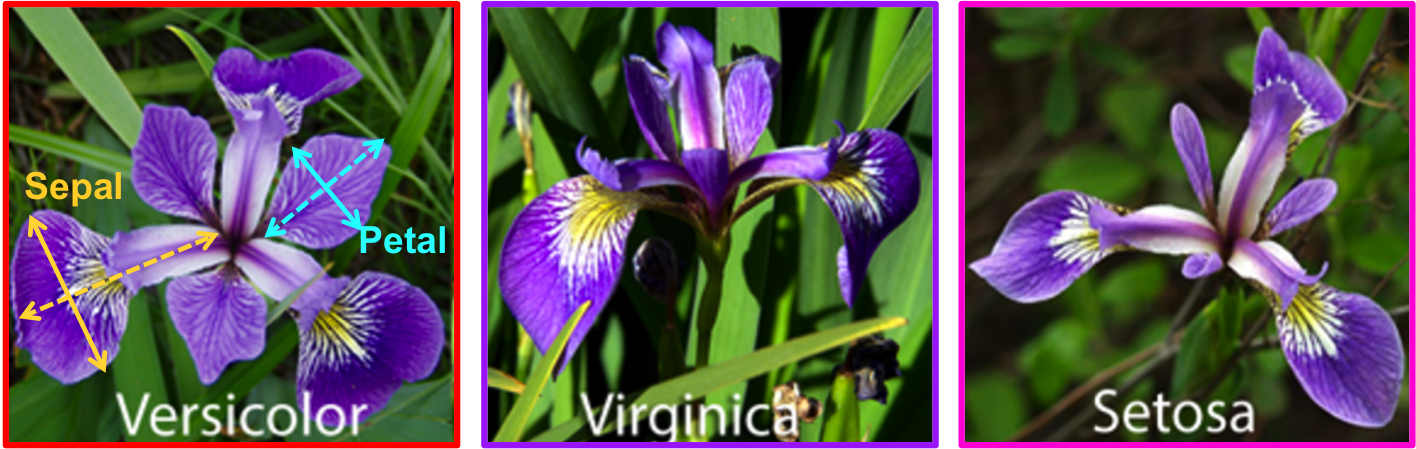

Here, only sepal width and length are chosen to separate the classes, to allow a graphical representation.

In [ ]:
from sklearn import datasets

# Loading data
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

iris_train, iris_test, iris_target_train,  iris_target_test  =   train_test_split(X, y, test_size=.35, random_state=2)
print("Training input size: "+str(iris_train.shape))
print("Testing input size: "+str(iris_test.shape))
iris_train[:5]

For recall, a polynom is:

$P(X)=1+\alpha_1 X+\alpha_2 X^2+\alpha_3 X^3+...$

In [ ]:
# Fit the classifier with default hyper-parameters
iris_clf = svm.SVC(kernel='poly')
model = iris_clf.fit(iris_train, iris_target_train)

In [ ]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig = plt.figure(figsize=(5,5))
ax=plt.gca()
plot_contours(ax, iris_clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("SVC Poly")
plt.show()

In [ ]:
## Predictions
iris_target_predictions=iris_clf.predict(iris_test)

plt.figure(figsize=(3,3))
sns.heatmap(metrics.confusion_matrix(iris_target_test,iris_target_predictions), annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show();

print("Accuracy: {0:.1f}%".format(metrics.accuracy_score(iris_target_test, iris_target_predictions) * 100))

### Trying the Radial Basis Function (RBF) kernel

RBF is a function that is centered on a point and that allows to catch round shapes when there are some.

$k(x_i, x_j) = \exp\left(- \frac{d(x_i, x_j)^2}{2l^2} \right)$

where $l$ is the length scale of the kernel and $d(x_i, x_j)$ is the Euclidean distance.

Here are two  1-Dimensional representation of that function centered on two different points

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/f/fb/Unnormalized_radial_basis_functions.svg/523px-Unnormalized_radial_basis_functions.svg.png width="400">

In [ ]:
# Fit the classifier with default hyper-parameters
iris_clf = svm.SVC(kernel='rbf')
model = iris_clf.fit(iris_train, iris_target_train)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig = plt.figure(figsize=(5,5))
ax=plt.gca()
plot_contours(ax, iris_clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("SVC RBF")
plt.show()

In [ ]:
## Predictions
iris_target_predictions=iris_clf.predict(iris_test)

plt.figure(figsize=(3,3))
sns.heatmap(metrics.confusion_matrix(iris_target_test,iris_target_predictions), annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show();

print("Accuracy: {0:.1f}%".format(metrics.accuracy_score(iris_target_test, iris_target_predictions) * 100))

### Final remark

Note that here we are missing half of the information. The accuracy would be better in the case we would select the whole information available.
You can try the different kernels seen so far : 'rbf', 'poly' and 'linear'

In [ ]:
# Loading data
X = iris.data
y = iris.target

iris_train, iris_test, iris_target_train,  iris_target_test  =   train_test_split(X, y, test_size=.35, random_state=2)

# Fit the classifier with default hyper-parameters
iris_clf_2 = svm.SVC(kernel='poly')
model = iris_clf_2.fit(iris_train, iris_target_train)

## Predictions
iris_target_predictions=iris_clf_2.predict(iris_test)

plt.figure(figsize=(3,3))
sns.heatmap(metrics.confusion_matrix(iris_target_test,iris_target_predictions), annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show();

print("Accuracy: {0:.1f}%".format(metrics.accuracy_score(iris_target_test, iris_target_predictions) * 100))

In [ ]:
iris_train